In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pickle as pkl

In [2]:
df = pd.read_csv('cardio_1.csv')

In [3]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,Exact_Age
0,2,168,62.0,110,80,1,1,0,0,0,50
1,1,156,85.0,140,90,3,1,0,0,1,55
2,1,165,64.0,130,70,3,1,0,0,1,51
3,2,169,82.0,150,100,1,1,0,0,1,48
4,1,156,56.0,100,60,1,1,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...
64771,1,165,80.0,150,80,1,1,0,0,1,57
64772,1,158,126.0,140,90,2,2,0,0,1,61
64773,2,183,105.0,180,90,3,1,0,1,1,52
64774,1,163,72.0,135,80,1,2,0,0,1,61


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64776 entries, 0 to 64775
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       64776 non-null  int64  
 1   height       64776 non-null  int64  
 2   weight       64776 non-null  float64
 3   ap_hi        64776 non-null  int64  
 4   ap_lo        64776 non-null  int64  
 5   cholesterol  64776 non-null  int64  
 6   gluc         64776 non-null  int64  
 7   smoke        64776 non-null  int64  
 8   alco         64776 non-null  int64  
 9   cardio       64776 non-null  int64  
 10  Exact_Age    64776 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 5.4 MB


In [6]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'cardio', 'Exact_Age'],
      dtype='object')

In [7]:
X = df[['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'Exact_Age']]

In [8]:
Y = df['cardio']

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,64776.0,1.356953,0.479105,1.0,1.0,1.0,2.0,2.0
height,64776.0,164.328856,8.367418,55.0,159.0,165.0,170.0,250.0
weight,64776.0,74.533245,14.578962,11.0,65.0,72.0,83.0,200.0
ap_hi,64776.0,126.688063,18.340697,-150.0,120.0,120.0,140.0,240.0
ap_lo,64776.0,81.441645,10.154988,-70.0,80.0,80.0,90.0,190.0
cholesterol,64776.0,1.385467,0.691865,1.0,1.0,1.0,2.0,3.0
gluc,64776.0,1.238730,0.584824,1.0,1.0,1.0,1.0,3.0
smoke,64776.0,0.093229,0.290755,0.0,0.0,0.0,0.0,1.0
alco,64776.0,0.056996,0.231838,0.0,0.0,0.0,0.0,1.0
cardio,64776.0,0.510467,0.499894,0.0,0.0,1.0,1.0,1.0


In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [11]:
x_train.shape

(45343, 10)

In [12]:
x_test.shape

(19433, 10)

In [13]:
y_train.shape

(45343,)

In [14]:
y_test.shape

(19433,)

# Logistic Regression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(x_train,y_train)

c:\Users\ADMIN\Downloads\project\Lung Cancer Classifiacation using Logistic Regression\pyvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
y_pred

array([1, 0, 1, ..., 0, 0, 0], shape=(19433,))

In [19]:
model.score(x_train,y_train)

0.7066360849524733

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.metrics import confusion_matrix, classification_report,precision_score

In [22]:
lacc = accuracy_score(y_test,y_pred)

In [23]:
lacc

0.7067874234549477

In [24]:
confusion_matrix(y_test,y_pred)

array([[6894, 2538],
       [3160, 6841]])

In [25]:
acc = ((5+2)/(5+2+0+86))#TP+TN/TP+TN+FP+PN
print('accuracy',acc)

accuracy 0.07526881720430108


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      9432
           1       0.73      0.68      0.71     10001

    accuracy                           0.71     19433
   macro avg       0.71      0.71      0.71     19433
weighted avg       0.71      0.71      0.71     19433



<Axes: >

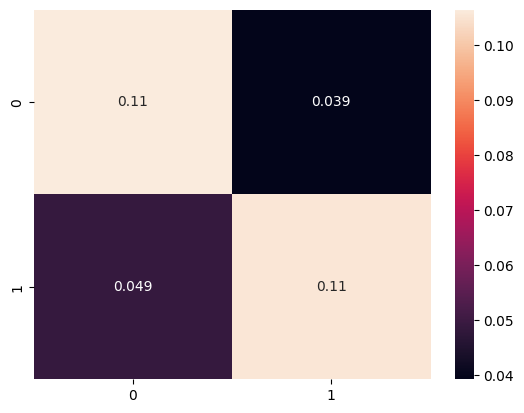

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pred) / len(Y), annot = True)

# Normalising usind MinMax Scalar and Rebuilt Logistic Regression

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
x_trained = scaler.fit_transform(x_train)
x_tested = scaler.transform(x_test)

In [30]:
#x_trained.shape

# Create new logistic regression model, fit on normalized training set and predict on the normalisation test set

In [31]:
model1 = LogisticRegression()

In [32]:
model1.fit(x_trained,y_train)

LogisticRegression()

In [33]:
y_pred1 = model1.predict(x_tested)

In [34]:
y_pred1

array([1, 0, 1, ..., 0, 0, 0], shape=(19433,))

In [35]:
model1.score(x_trained,y_train)

0.720022936285645

In [36]:
acc1 = accuracy_score(y_test,y_pred1)

In [37]:
acc1

0.7194463026810065

In [38]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      9432
           1       0.74      0.69      0.72     10001

    accuracy                           0.72     19433
   macro avg       0.72      0.72      0.72     19433
weighted avg       0.72      0.72      0.72     19433



# Decision Tree Classifier

In [39]:
model2 = DecisionTreeClassifier()

In [40]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred2 = model2.predict(x_test)

In [42]:
y_pred2

array([0, 1, 1, ..., 0, 0, 1], shape=(19433,))

In [43]:
model2.score(x_train,y_train)

0.9813422137926472

In [44]:
acc2 = accuracy_score(y_test,y_pred2)

In [45]:
acc2

0.6150877373539855

In [46]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      9432
           1       0.63      0.61      0.62     10001

    accuracy                           0.62     19433
   macro avg       0.62      0.62      0.62     19433
weighted avg       0.62      0.62      0.62     19433



# Random Forest Classifier

In [47]:
model3 = RandomForestClassifier()

In [48]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
y_pred3 = model3.predict(x_test)

In [50]:
y_pred3

array([1, 1, 1, ..., 0, 0, 1], shape=(19433,))

In [51]:
model3.score(x_train,y_train)

0.9813201596718347

In [52]:
acc3 = accuracy_score(y_test,y_pred3)

In [53]:
acc3

0.6832192661966757

In [54]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      9432
           1       0.69      0.69      0.69     10001

    accuracy                           0.68     19433
   macro avg       0.68      0.68      0.68     19433
weighted avg       0.68      0.68      0.68     19433



# Support Vector Machine Classifiation

In [55]:
#model4 = svm.SVC(kernel = 'linear')

In [56]:
#model4.fit(x_train,y_train)

In [57]:
#y_pred4 = model4.predict(x_test)

In [58]:
#y_pred4

In [60]:
#acc4 = accuracy_score(y_test,y_pred4)

In [61]:
#acc4

In [62]:
#print(classification_report(y_test,y_pred4))

# KNeighborsClassifier

In [63]:
model5 = KNeighborsClassifier()

In [64]:
model5.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
y_pred5 = model5.predict(x_test)

In [66]:
y_pred5

array([1, 0, 1, ..., 0, 1, 0], shape=(19433,))

In [67]:
acc5 = accuracy_score(y_test,y_pred5)

In [68]:
acc5

0.682550301034323

In [69]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      9432
           1       0.70      0.68      0.69     10001

    accuracy                           0.68     19433
   macro avg       0.68      0.68      0.68     19433
weighted avg       0.68      0.68      0.68     19433



# Naive Bayes Classifier

In [70]:
model6 = GaussianNB()

In [71]:
model6.fit(x_train,y_train)

GaussianNB()

In [72]:
y_pred6 = model6.predict(x_test)

In [73]:
y_pred

array([1, 0, 1, ..., 0, 0, 0], shape=(19433,))

In [75]:
acc6 = accuracy_score(y_test,y_pred6)

In [76]:
acc6

0.699017135799928

In [77]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      9432
           1       0.76      0.61      0.68     10001

    accuracy                           0.70     19433
   macro avg       0.71      0.70      0.70     19433
weighted avg       0.71      0.70      0.70     19433



# Finding Best Model

In [80]:
print('Logistic Regression',lacc)
print('Logistic Regression with MinmaxScaler',acc1)
print('Decision Tree classifier',acc2)
print('Random Forest classifier',acc3)
#print('support vector machine classifier',acc4)
print('k nearest neighbour classifier',acc5)
print('naive bayes classifier',acc6)

Logistic Regression 0.7067874234549477
Logistic Regression with MinmaxScaler 0.7194463026810065
Decision Tree classifier 0.6150877373539855
Random Forest classifier 0.6832192661966757
k nearest neighbour classifier 0.682550301034323
naive bayes classifier 0.699017135799928


# Logistic Regression is the best model with the best accuracy of 97%

In [81]:
d = pkl.dump(model,open('vas.pkl','wb'))